In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sklearn
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

test_proportion = 0.2
training_data = df[["petal length (cm)"]]
observations = df[["petal width (cm)"]]

x_train, x_test, y_train, y_test = train_test_split(
    training_data, observations, test_size=test_proportion, random_state=42
)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 1)
(30, 1)
(120, 1)
(30, 1)


# Task 1

In [15]:
x_test, x_dev, y_test, y_dev = train_test_split(
    x_test, y_test, test_size=0.5, random_state=42
)
print(x_dev.shape)
print(x_test.shape)


(15, 1)
(15, 1)


# Task 2

In [30]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)


DecisionTreeRegressor()

# Task 3

/home/timothy/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


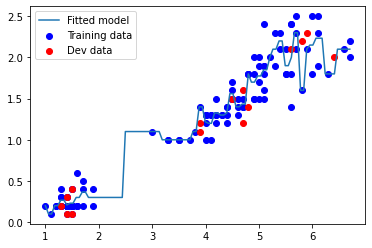

In [39]:
plt.figure()
min_x = min(x_train.to_numpy().min(), x_dev.to_numpy().min())
max_x = max(x_train.to_numpy().max(), x_dev.to_numpy().max())


x_pts = np.linspace(min_x, max_x, 100)[:, np.newaxis]
y = dtree.predict(x_pts)
plt.plot(x_pts, y)

plt.scatter(x_train, y_train, c="b")
plt.scatter(x_dev, y_dev, c="r")

plt.legend(["Fitted model", "Training data", "Dev data"])

plt.show()


# Task 4

In [42]:
from sklearn.metrics import mean_squared_error

pred = dtree.predict(x_test)
print(mean_squared_error(y_test, pred))

dev_pred = dtree.predict(x_dev)
print(mean_squared_error(y_dev, dev_pred))


0.04303629629629625
0.05974879706152434


# Task 5

In [45]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train, y_train)

pred = lreg.predict(x_test)
print(mean_squared_error(y_test, pred))

dev_pred = lreg.predict(x_dev)
print(mean_squared_error(y_dev, dev_pred))


0.059829755744389555
0.03137881245093413


# Task 6

In [49]:
from sklearn.model_selection import GridSearchCV


grid = {"max_depth": np.arange(1, 10)}

dtree = GridSearchCV(DecisionTreeRegressor(), cv=10, param_grid=grid)
dtree.fit(x_train, y_train)

print(dtree.cv_results_["mean_test_score"])

print(dtree.best_params_)
print(dtree.best_score_)

pred = dtree.best_estimator_.predict(x_test)
print(mean_squared_error(y_test, pred))

dev_pred = dtree.best_estimator_.predict(x_dev)
print(mean_squared_error(y_dev, dev_pred))



[0.74835628 0.90961996 0.9125529  0.92283633 0.9173477  0.90502481
 0.90170744 0.90176642 0.89754495]
{'max_depth': 4}
0.9228363301519005
0.04110532192675047
0.024458881486478904


# Task 7

In [52]:
best_dtree = dtree.best_estimator_
best_dtree.fit(x_train, y_train)

best_pred = best_dtree.predict(x_test)
print(mean_squared_error(y_test, best_pred))

linreg = lreg.predict(x_test)
print(mean_squared_error(y_test, linreg))


0.04110532192675047
0.059829755744389555
